In [1]:
# IMPORT DATASETS

import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import metrics


data=pd.read_csv('HR_comma_sep.csv')
print(data.head())
print(data.shape)

   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years  sales  \
0                   3              0     1                      0  sales   
1                   6              0     1                      0  sales   
2                   4              0     1                      0  sales   
3                   5              0     1                      0  sales   
4                   3              0     1                      0  sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4 

In [2]:
# PREPROCESSING

le=preprocessing.LabelEncoder()
data['Encoded Salary']=le.fit_transform(data['salary'])
data['Dept']=le.fit_transform(data['sales'])
# Displaying to see the transformation 
print(data[['Encoded Salary','Dept']])
data.sales.unique()
# pd.unique(data[['sales', 'Dept']].values.ravel('K'))

       Encoded Salary  Dept
0                   1     7
1                   2     7
2                   2     7
3                   1     7
4                   1     7
...               ...   ...
14994               1     8
14995               1     8
14996               1     8
14997               1     8
14998               1     8

[14999 rows x 2 columns]


array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [4]:
x=data[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 
        'time_spend_company', 'Work_accident', 'promotion_last_5years', 'Dept', 'Encoded Salary']]
y=data['left']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(x_test)

       satisfaction_level  last_evaluation  number_project  \
6723                 0.65             0.96               5   
6473                 0.88             0.80               3   
4679                 0.69             0.98               3   
862                  0.41             0.47               2   
7286                 0.87             0.76               5   
...                   ...              ...             ...   
3297                 0.61             0.74               2   
14113                0.93             0.89               3   
5514                 0.78             0.61               3   
9939                 0.89             0.76               2   
14346                0.31             0.84               7   

       average_montly_hours  time_spend_company  Work_accident  \
6723                    226                   2              1   
6473                    166                   2              0   
4679                    214                   2          

In [5]:
# Training the model

clf=MLPClassifier(hidden_layer_sizes=(6,5),random_state=5,verbose=False,learning_rate_init=0.01)
clf.fit(x_train,y_train)
clf.loss_curve_

testX = [[0.37,0.32,2,188,3,0,0,7,0]]  #Employee will leave
#testX = [[0.77,0.72,2,159,3,0,0,2,2]]    #Employee will stay 
testpred=clf.predict(testX)
print("testpred is :", testpred)

if testpred == 0: 
  print("Employee will stay")
else:
  print("Employee will leave")


testpred is : [1]
Employee will leave


In [13]:
# Predictions

ypredtest=clf.predict(x_test)
ypredtrain = clf.predict(x_train)
print("Accuracy Score for Train Data is",accuracy_score(y_train,ypredtrain))
print("Accuracy Score for Test Data is", accuracy_score(y_test,ypredtest))
conftrain= confusion_matrix(y_train,ypredtrain)
print("Train Confusion Matrix is\n", confusion_matrix(y_train,ypredtrain))
conftest=confusion_matrix(y_test,ypredtest)
print("Train Confusion Matrix is\n", confusion_matrix(y_test,ypredtest))
print("\n Train Precision is", metrics.precision_score(y_train, ypredtrain))
print("\n Test Precision is", metrics.precision_score(y_test, ypredtest))
print("\n Train Recall is", metrics.recall_score(y_train, ypredtrain))
print("\n Test Recall is", metrics.recall_score(y_test, ypredtest))
TN, FN, FP, TP =metrics.confusion_matrix(list(y_test),list(ypredtest),labels=[0,1]).ravel()
print("\n For Test Data")
print("\nTN",TN)
print("\nTP",TP)
print("\nFN",FN)
print("\nFP",FP)
TN, FN, FP, TP =metrics.confusion_matrix(list(y_train),list(ypredtrain),labels=[0,1]).ravel()
print("\n For Test Data")
print("\nTN",TN)
print("\nTP",TP)
print("\nFN",FN)
print("\nFP",FP)

Accuracy Score for Train Data is 0.9455787982331861
Accuracy Score for Test Data is 0.938
Train Confusion Matrix is
 [[8699  435]
 [ 218 2647]]
Train Confusion Matrix is
 [[2175  119]
 [  67  639]]

 Train Precision is 0.8588578844905905

 Test Precision is 0.8430079155672823

 Train Recall is 0.9239092495636998

 Test Recall is 0.9050991501416431

 For Test Data

TN 2175

TP 639

FN 119

FP 67

 For Test Data

TN 8699

TP 2647

FN 435

FP 218


Text(0.5, 304.64445454545455, 'Predicted label')

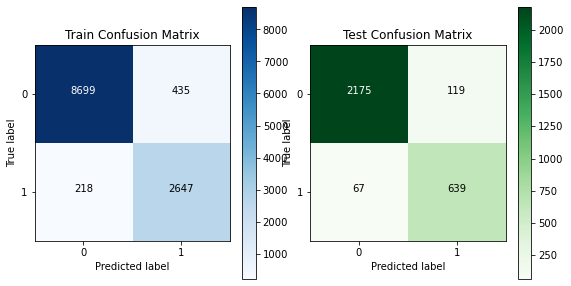

In [12]:
import itertools

classes = [0, 1]

# plot train  confusion matrix
myplt=plt.figure(figsize=(8,8))
ax1 = myplt.add_subplot(2,2,1)

plt.imshow(conftrain, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Train Confusion Matrix")
ax1=plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

fmt = 'd'
thresh = conftrain.max() / 2.
for i, j in itertools.product(range(conftrain.shape[0]), range(conftrain.shape[1])):
    plt.text(j, i, format(conftrain[i, j], fmt),
             horizontalalignment="center",
             color="white" if conftrain[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

# plot test confusion matrix
ax2 = myplt.add_subplot(2,2,2)

plt.imshow(conftest, interpolation='nearest', cmap=plt.cm.Greens)
plt.title("Test Confusion Matrix")
ax2=plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

fmt = 'd'
thresh = conftest.max() / 2.
for i, j in itertools.product(range(conftest.shape[0]), range(conftest.shape[1])):
    plt.text(j, i, format(conftest[i, j], fmt),
             horizontalalignment="center",
             color="white" if conftest[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')